#  <span style="color:darkgreen">ROLLING STONE ALBUM RANKINGS</span>
<span style="color:crimson">**2024 Tidytuesday  Week 19** </span>

##  Setup

### Libraries

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import os

### Fonts and Highlights

In [121]:
#from highlight_text import ax_text, fig_text
from matplotlib import rcParams
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

In [122]:

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'

### Data

In [2]:
pwd()

'/Users/birusod/Documents/DataScienceDocs/GitProjects/Projects2024/PyDocs/W19_RollingStone'

In [6]:
os.getcwd()
os.listdir()

['w19album_ranking.ipynb']

In [8]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-07/rolling_stone.csv"
dd = pd.read_csv(data_url)
dd.head(3)

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.0,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.0,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.0,0.0,7GXP5OhYyPVLmcVfO9Iqin


## Data Wrangling

### Overview (eda)

In [9]:
dd.shape

(691, 21)

In [10]:
dd.columns

Index(['sort_name', 'clean_name', 'album', 'rank_2003', 'rank_2012',
       'rank_2020', 'differential', 'release_year', 'genre', 'type',
       'weeks_on_billboard', 'peak_billboard_position', 'spotify_popularity',
       'spotify_url', 'artist_member_count', 'artist_gender',
       'artist_birth_year_sum', 'debut_album_release_year',
       'ave_age_at_top_500', 'years_between', 'album_id'],
      dtype='object')

In [11]:
dd.describe()

,rank_2003,rank_2012,rank_2020,differential,release_year,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between
count,500.000000,500.000000,500.000000,691.000000,691.000000,572.000000,691.000000,654.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,250.504000,250.500000,250.500000,-12.322721,1982.872648,64.270979,61.193922,55.805810,2.746356,5363.214286,1976.871720,29.609107,5.928571
std,144.486063,144.481833,144.481833,199.041031,14.554784,75.141513,77.156551,14.948525,2.023174,3947.127116,14.958566,9.348495,8.420647
min,1.000000,1.000000,1.000000,-501.000000,1955.000000,1.000000,1.000000,10.000000,1.000000,1910.000000,1934.000000,17.000000,0.000000
25%,125.750000,125.750000,125.750000,-137.500000,1971.000000,20.750000,2.000000,46.000000,1.000000,1948.000000,1966.250000,24.041667,1.000000
50%,250.500000,250.500000,250.500000,-8.000000,1979.000000,44.500000,17.000000,57.000000,2.000000,3896.000000,1973.000000,27.000000,3.000000
75%,375.250000,375.250000,375.250000,106.000000,1994.000000,81.000000,111.500000,68.000000,4.000000,7845.000000,1989.000000,31.000000,7.000000
max,500.000000,500.000000,500.000000,484.000000,2019.000000,741.000000,201.000000,91.000000,12.000000,23368.000000,2019.000000,88.000000,54.000000


In [51]:
dd.isnull().mean().sort_values()

sort_name                   0.000000
peak_billboard_position     0.000000
type                        0.000000
release_year                0.000000
differential                0.000000
album_id                    0.000000
album                       0.000000
clean_name                  0.000000
years_between               0.007236
artist_member_count         0.007236
artist_gender               0.007236
artist_birth_year_sum       0.007236
debut_album_release_year    0.007236
ave_age_at_top_500          0.007236
spotify_url                 0.052098
spotify_popularity          0.053546
weeks_on_billboard          0.172214
genre                       0.237337
rank_2012                   0.276411
rank_2003                   0.276411
rank_2020                   0.276411
dtype: float64

In [52]:
ddc = dd.dropna()
ddc.isnull().mean().sort_values()

sort_name                   0.0
ave_age_at_top_500          0.0
debut_album_release_year    0.0
artist_birth_year_sum       0.0
artist_gender               0.0
artist_member_count         0.0
spotify_url                 0.0
spotify_popularity          0.0
peak_billboard_position     0.0
years_between               0.0
weeks_on_billboard          0.0
genre                       0.0
release_year                0.0
differential                0.0
rank_2020                   0.0
rank_2012                   0.0
rank_2003                   0.0
album                       0.0
clean_name                  0.0
type                        0.0
album_id                    0.0
dtype: float64

### Final data

In [90]:
dds = ddc[['release_year', 'clean_name', 'album', 'differential']]

ddf = (dds
    .assign(abs = lambda x: abs(x['differential']))
    .assign(pos = lambda x: x['differential'] > 0)
    .rename(columns={'release_year':'year', 'clean_name':'name'})
    .sort_values('abs', ascending=False)
    .groupby('pos')
    .head(10)
    .reset_index(drop=True)
)


In [83]:
ddf.head()

,year,name,album,differential,abs,pos
0,2000,D'Angelo,Voodoo,460,460,True
1,2001,Jay-Z,The Blueprint,414,414,True
2,2000,Radiohead,Kid A,408,408,True
3,1975,Al Green,Greatest Hits,-404,404,False
4,1994,Hole,Live Through This,360,360,True


In [91]:
for i in range(20): 
    # Colour of bar chart is set to red if the sales  
    # is < 60000 and green otherwise 
    ddf['col_var'] = ['red' if float( 
        val) < 0 else 'green' for val in ddf['differential']]

In [92]:
ddf.head(2)

,year,name,album,differential,abs,pos,col_var
0,2000,D'Angelo,Voodoo,460,460,True,green
1,2001,Jay-Z,The Blueprint,414,414,True,green


## Viz

In [66]:
ddf_dif = ddf[['name', 'differential']].sort_values('differential', ascending=False).set_index('name')

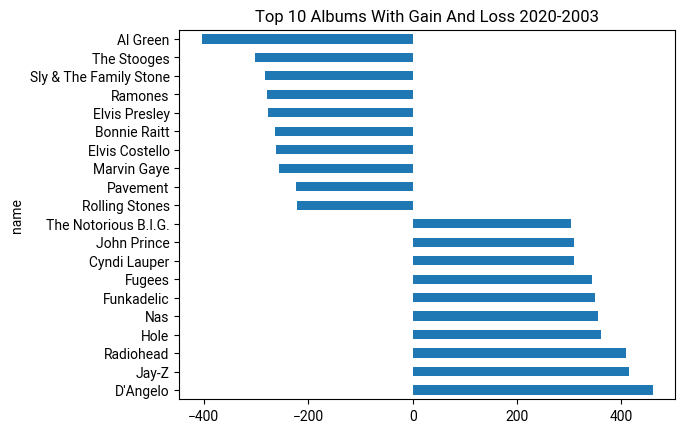

In [123]:
ddf_dif.plot(kind =  'barh', legend = False, title  = 'Top 10 Albums With Gain And Loss 2020-2003')
plt.show()

In [93]:
ddf_sorted = ddf.sort_values(['differential'])

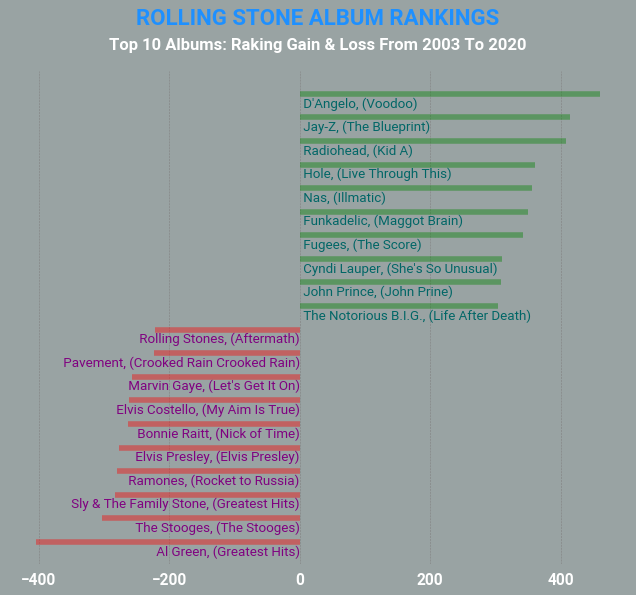

In [175]:
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#99a3a3', dpi=80) 
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
  
# Plotting the horizontal lines 
ax.hlines(
    y=ddf_sorted.name, 
    xmin=0,
    xmax=ddf_sorted.differential, 
    color=ddf_sorted.col_var, 
    alpha=0.4, 
    linewidth=5) 

for i, (val, album, name) in enumerate(zip(ddf_sorted['differential'], ddf_sorted['album'], ddf_sorted['name'])):
    if val > 0:
        ax.text(x=0, y=i - .4, s=f' {name}, ({album})', ha='left', va='center', fontsize=12, color= '#006666')
    else:
        ax.text(x=0, y=i - .4, s=f' {name}, ({album})', ha='right', va='center', fontsize=12, color= 'purple')

ax.set(frame_on=False)
ax.set_xlabel('')
ax.set_ylabel('')

ax.tick_params(left=False, bottom=False, labelleft = False, labelbottom = True, colors='white')
ax.grid(visible=True, which='major', axis='x', color='grey', linestyle='--', linewidth=.5)

plt.xticks(fontsize=14, fontweight="bold")

fig.suptitle("ROLLING STONE ALBUM RANKINGS", size=20, x=mid, color = 'dodgerblue', weight='bold', family = 'Roboto')
ax.set_title(
    "Top 10 Albums: Raking Gain & Loss From 2003 To 2020",
    size=15, x=.5, color = 'white', weight='bold', pad=20, family  = 'Roboto')

plt.show() 

In [82]:
ddf_sorted

,year,name,album,differential,abs,pos
3,1975,Al Green,Greatest Hits,-404,404,False
11,1969,The Stooges,The Stooges,-303,303,False
12,1970,Sly & The Family Stone,Greatest Hits,-283,283,False
13,1977,Ramones,Rocket to Russia,-280,280,False
14,1956,Elvis Presley,Elvis Presley,-277,277,False
15,1989,Bonnie Raitt,Nick of Time,-263,263,False
16,1977,Elvis Costello,My Aim Is True,-262,262,False
17,1973,Marvin Gaye,Let's Get It On,-257,257,False
18,1994,Pavement,Crooked Rain Crooked Rain,-224,224,False
19,1966,Rolling Stones,Aftermath,-222,222,False
